In [62]:
import warnings

warnings.filterwarnings('ignore')

# Naive Bayes 

In [2]:
import numpy as np 
import pandas as pd

In [14]:
# Load dataset
dataset = pd.read_csv('adult_test.csv')
dataset.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [15]:
len(dataset)

16281

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  country         16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [51]:
dataset.select_dtypes('number').columns.to_list()

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Info about the dataset

In [16]:
def values_of_features():
    for feature in dataset.columns.to_list():
        print(f'values of {dataset[feature].name} are:\n {dataset[feature].unique()}')
values_of_features()

values of age are:
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
values of workclass are:
 [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
values of fnlwgt are:
 [226802  89814 336951 ... 349230 321403  83891]
values of education are:
 [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
values of education_num are:
 [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
values of marital_status are:
 [' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
values of occupation are:
 [' Machine-op-inspct' ' Farming-fishing' ' Protective-ser

##### We see that in some features there are **'?'** values which represent the null for us, and it's why we have to replace them with the **most frequent value** in each column

### Cleaning the dataset

In [17]:
# replacing the ' ?' in some cells with the most frequent value
for feature in dataset.columns.to_list():
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].replace(" ?", mode)


Take a look at the values of each column after replacement

In [18]:
values_of_features()

values of age are:
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
values of workclass are:
 [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
values of fnlwgt are:
 [226802  89814 336951 ... 349230 321403  83891]
values of education are:
 [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
values of education_num are:
 [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
values of marital_status are:
 [' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
values of occupation are:
 [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 '

We see that the **?** symbol in some of the columns is gone now

## Naive Bayes Algorithm

#### I. Method to calculate the conditional probabilities of each value in each feature

In [19]:
# Method to calculate likelihood
def calculate_likelihood(dataset, feature_name, value, label_col, label):
    # get the rows where the label equals the passed target 
    target_label_df = dataset[dataset[label_col]==label]
    # calculate the conditional probability of the features's value
    feature_given_label = len(target_label_df[target_label_df[feature_name]==value])/len(target_label_df)
    # return the calculated probability
    return feature_given_label

In [75]:
# method to calculate likelihood of numerical features for one single sample 
import numpy as np
from scipy.stats import norm

def calculate_numerical_likelihood(feature_value, feature_values, target_values, target_label):
    """
    Calculate the likelihood of a numerical feature given a specific target label.

    Parameters:
    feature_value (number): the value of the numerical feature for the sample
    feature_values (array-like): The values of the numerical feature.
    target_values (array-like): The corresponding target labels.
    target_label (str or int): The target label for which likelihood is calculated.

    Returns:
    float: The likelihood of the numerical feature given the target label.
    """
    # Filter feature values corresponding to the target label
    feature_values_target = feature_values[target_values == target_label]
    
    # Calculate mean and standard deviation of the feature values
    mean = np.mean(feature_values_target)
    std_dev = np.std(feature_values_target)

    # Use normal distribution to calculate likelihood
    likelihood = norm.pdf(feature_value, mean, std_dev)

    return likelihood

#### Method to calculate the likelihood of all values in the dataset for categorical features:
    this method returns a dictionary of likelihoods for categorical features as the likelihoods for the numerical feature is calculated sample by sample

In [77]:
def likelihood_dict(dataset, target_col):
    dict = {}
    labels_arr = dataset[target_col].unique()

    numerical_features = dataset.select_dtypes('number').columns.to_list()
    for feature in dataset.columns.to_list()[:-1]:
        """if feature in numerical_features:
            dict[feature][np.mean(dataset[feature])] = {}
            for label in labels_arr:
                dict[feature][np.mean(dataset[feature])][label] = calculate_numerical_likelihood(dataset[feature], dataset[target_col], label) 
        else:"""
        if feature not in numerical_features:
            dict[feature] = {}
            for value in dataset[feature].unique():
                dict[feature][value] = {}
                for label in labels_arr:
                    dict[feature][value][label] = calculate_likelihood(dataset, feature, value, target_col, label)
    return dict

# testing the method
dict = likelihood_dict(dataset, 'income')
dict  #['hours_per_week']

{'workclass': {' Private': {' <=50K.': 0.7780458383594693,
   ' >50K.': 0.6495059802392096},
  ' Local-gov': {' <=50K.': 0.058946521913952554,
   ' >50K.': 0.08060322412896516},
  ' Self-emp-not-inc': {' <=50K.': 0.07784479292320064,
   ' >50K.': 0.09178367134685388},
  ' Federal-gov': {' <=50K.': 0.022677925211097707,
   ' >50K.': 0.04940197607904316},
  ' State-gov': {' <=50K.': 0.04069159630076397,
   ' >50K.': 0.046021840873634944},
  ' Self-emp-inc': {' <=50K.': 0.02114997989545637,
   ' >50K.': 0.08216328653146125},
  ' Without-pay': {' <=50K.': 0.0004020908725371934,
   ' >50K.': 0.0005200208008320333},
  ' Never-worked': {' <=50K.': 0.00024125452352231604, ' >50K.': 0.0}},
 'education': {' 11th': {' <=50K.': 0.0486529955770004,
   ' >50K.': 0.008320332813312533},
  ' HS-grad': {' <=50K.': 0.35826296743063935, ' >50K.': 0.21528861154446177},
  ' Assoc-acdm': {' <=50K.': 0.03104141535987133,
   ' >50K.': 0.03848153926157046},
  ' Some-college': {' <=50K.': 0.234097305991154,
   '

#### II. Method to caculate the prior probabilities of each label

In [46]:
def calculate_prior_probs(target_col):
    # a list with a prob for each label value
    prior = []
    for label in target_col.unique():
        prior.append(len(target_col[target_col==label])/len(target_col))
    return prior

#### III. Method to perform the naive bayes algorithm

In [78]:
def naive_bayes(dataset, x, y):
    """
    A method to make the prediction using the Naive Bayes algorithm

    Parameters:
    dataset (pandas dataframe): the dataset we want to use to make the prediction
    x (pandas dataframe): the set of independant features to be used 
    y (string): the class/label we want to evaluate if the samples correspond to or not

    """
    feature_names = x.columns.to_list()

    # calculate the prior probabilities of each target label
    prior_prob = calculate_prior_probs(y)

    # a list to store the prediction of the class of each sample 
    y_pred = []  # with one prediction per sample 

    # calculate the likelihood of all the values of all features
    liklihoods_dict = likelihood_dict(dataset, y.name)

    # for each sample in the dataset
    for x_idx in range(len(x)):
        # a list to store the result of the multiplication of the likelihood for each label of all the features in the sample 
        likelihood = [1]*len(y.unique())
        # for each label/target value calculate the likelihood
        for i,label in enumerate(y.unique()):
            # loop over each feature value
            for j, feature in enumerate(feature_names):
                # calculate the likelihood of the feature 
                # if the feature is numeric
                if feature in dataset.select_dtypes('number').columns.to_list():
                    likelihood[i] *= calculate_numerical_likelihood(x.iloc[x_idx][j], dataset[feature], y, label)
                    # *= liklihoods_dict[feature][np.mean(x[feature])][label]
                else:
                    likelihood[i] *= liklihoods_dict[feature][x.iloc[x_idx][j]][label]
        
        # calculate the posterior probability for the sample
        posterior_prob = np.asanyarray(prior_prob)*np.asanyarray(likelihood)
        y_pred.append(y.unique()[np.argmax(posterior_prob)])
    return y_pred

In [33]:
dataset.iloc[2][0]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24396\3901464396.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset.iloc[2][0]


28

In [79]:
features = dataset.drop('income', axis=1)
target = dataset['income']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# make the prediction
y_pred = naive_bayes(dataset, features, target)


In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))

[[11594   841]
 [ 1965  1881]]


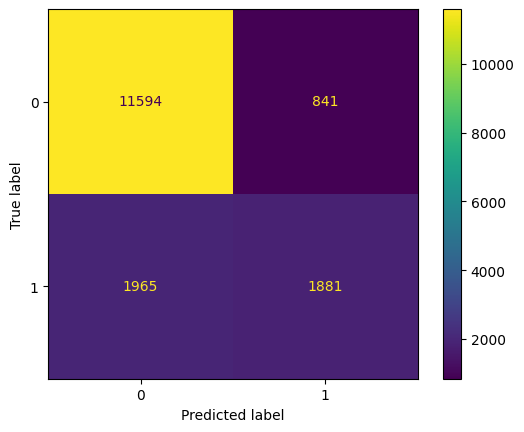

In [81]:
# Plot a confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(target, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix= cm)
display.plot()

##### Calculate sensitivity and specificity

In [82]:
def sensitivity(cm):
    return (cm[1][1])/(cm[0][1]+cm[1][1])
def specificity(cm):
    return (cm[0][0])/(cm[0][0]+cm[1][0])

In [83]:
print(f"Sensitivity = {sensitivity(cm)}\nSpecificity = {specificity(cm)}")

Sensitivity = 0.6910360029390155
Specificity = 0.8550778080979423
